# CRIM Project Data Analysis With CRIM Intervals




## Introduction

This **Jupyter Notebook** brings together various tools for the analysis of symbolic music scores used in **The CRIM Project** (https://crimproject.org). It relies on **Pandas**, a popular Python package that makes the manipulaton of tabular information (in things called **data frames**) fast and relatively easy. 
<br>

Some of these tools are meant to give insights in **one work at a time**.  Others are meant to help us explore **sets of pieces**, or even **an entire corpus**.  

<br>
There are several components:

#### CRIM Intervals ####
* **CRIM Intervals** (https://github.com/HCDigitalScholarship/intervals) builds upon the successful **music21** (https://web.mit.edu/music21/) toolkit for music analysis.  With it we can gather information about any piece, including **pitches**, **melodic intervals**, **harmonic intervals**, and **contrapuntal modules**.  Each of these methds is demonstrated and explained below. 
<br>

* **The Classifier** also includes various tools that predict **Presentation Types** commonly found in Renaissance polyphony, including **Fugas**, **Imitative Duos**, **Non-Imitative Duos**, and **Periodic Entries**.
<br>

#### Heatmaps and Graphs ####

* Some **CRIM Metadata Heatmaps and Graphs** chart musical patterns as observed by participants in the CRIM Project.  With these we can view **Observations** and **Relationships** found in individual works or sets of them.  Some graphs can be used to chart similar families of sub-type of particular patterns, such as the melodic of time intervals found in fugas, PEns, and other patterns.
<br>
* **CRIM Intervals Heatmaps** chart patterns found by the CRIM Intervals themselves, including the distribution of nGrams across a composition, or viewers that  
<br>
* **Similarity Maps** all users to chart similar soggetti (nGrams) across a piece, with variable thresholds. 
<br>
* **Network Graphs** use CRIM Metadata and CRIM Interval data to chart connections between groups of pieces, according to the musical patterns or procedures they use, or the kinds of quotation and transformation they apply to their models.

#### Learn More about Individual Tools ####

*  The individual tools (called **methods** in Python and Pandas) can be adjusted in various ways, such as **diatonic vs chromatic**, **compound vs simple intervals**, **real vs constant durations**, as well as **pattern length**, **similarity**.  
<br>
* Read the documentation with this command `print(model.YourMethod.__doc__)`, where you will replace 'YourMethod' with the name of the individual method, for example `print(model.getMelodic.__doc__)`.
<br>

#### Run the Notebook; Save Outputs ####

* **Jupyter Notebooks** are organized as 'cells', which can be **commentary** (like this one, which is static), or **code** (those below, which produce dyanmic output in the form of charts or tabular data frames.  The latter can be saved to your workspace or computer as CSV or other standard files.
<br>
* To run an individual cell, use the `arrow/run` command at the top of the Notebook, or just press `Shift + Enter` on your keyboard.

In [15]:
from main import *
from classify import batch_classify
import pandas as pd
import re
import altair as alt
import visualizations as viz
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests

## A. Import an MEI file from CRIM

* Models take the form `CRIM_Model_0000.mei`
<br>

* Masses take the form `CRIM_Mass_0000_1`  ("1" in this case means the **Kyrie**)

See a list of **all CRIM works** via the **CRIM Project** site:  

* Models:  http://crimproject.org/models/
* Masses: http://crimproject.org/masses/

### A.1 Import a Piece

In [16]:
piece = 'https://crimproject.org/mei/CRIM_Model_0008.mei'
corpus = CorpusBase([piece])


Memoized piece detected...


### A.2 Check the Title

In [17]:
model = corpus.scores[0]
model.score.metadata.title

'Ave Maria'

## B.  Table of Notes+Rests

* **CRIM Intervals** is based on **Pandas**, which is a **Python** code library
<br>

* **Pandas Data Frames** are tables that can be processed in all kinds of ways (search for patterns, statistics, visualizations, etc).
<br>

* The column at the left of these data frames is an **index**, in this case corresponding to the **offset** numbers from music21. An offset of 1.0 corresponds to one quarter note. 
<br>

* Note that music21 uses `zero-based indexing`, so that the first note of the piece is **0**.




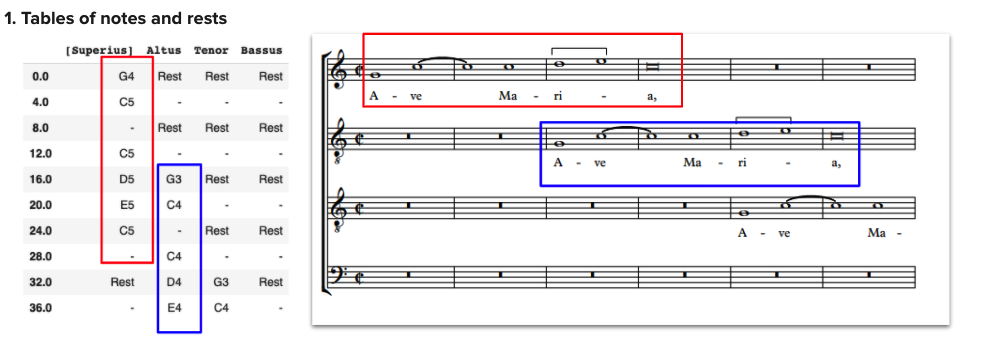

### B.1  Get Table of Notes and Rests

* Long data frames are automatically abbreviated to show only the first five and last five rows.  
<br>

* To see more rows, try `model.getNoteRest.head(20)` (which is the first 20 rows), or `model.getNoteRest.tail(20)`, which is the last 20 rows.
<br>
* Or view a CSV of the entire output with `model.getNoteRest.to_csv('List_all_Notes.csv')`  (you can replace `List_all_Notes` with any file name you prefer.
<br>


In [18]:
nr = model.getNoteRest().fillna('-')
nr

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,-,-,-
8.0,-,Rest,Rest,Rest
12.0,C5,-,-,-
16.0,D5,G3,Rest,Rest
...,...,...,...,...
1256.0,-,-,D4,G3
1268.0,C5,G4,-,-
1272.0,-,-,C4,C3
1284.0,C5,G4,-,-


#### What about Durations? ####
* The `-` symbol in the dataframe above means that there was **no new musical event at that offset in a given voice**--thus the continuation of a rest or a tied/held note.  We can use `model.getDuration()` to tell us more about rhythms, and then combine the two dataframes into a synoptic view of the pitches and durations of the piece. 

In [19]:
dur = model.getDuration().fillna('-')
dur

,[Superius],Altus,Tenor,Bassus
0.0,4.0,8.0,8.0,8.0
4.0,8.0,-,-,-
8.0,-,8.0,8.0,8.0
12.0,4.0,-,-,-
16.0,4.0,4.0,8.0,8.0
...,...,...,...,...
1256.0,-,-,16.0,16.0
1268.0,16.0,16.0,-,-
1272.0,-,-,16.0,16.0
1284.0,20.0,20.0,-,-


In [20]:
combined_notes_durs = pd.concat([nr, dur], axis=1)
combined_notes_durs

,[Superius],Altus,Tenor,Bassus,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest,4.0,8.0,8.0,8.0
4.0,C5,-,-,-,8.0,-,-,-
8.0,-,Rest,Rest,Rest,-,8.0,8.0,8.0
12.0,C5,-,-,-,4.0,-,-,-
16.0,D5,G3,Rest,Rest,4.0,4.0,8.0,8.0
...,...,...,...,...,...,...,...,...
1256.0,-,-,D4,G3,-,-,16.0,16.0
1268.0,C5,G4,-,-,16.0,16.0,-,-
1272.0,-,-,C4,C3,-,-,16.0,16.0
1284.0,C5,G4,-,-,20.0,20.0,-,-


### B.2 Measures and Beats

* This can be used with any other data frame to translate **offsets** into **measure + beat addresses**
<br>

* In this instance we 'pass' a name representing the first set of results `combined_notes_durs` (a short name for 'NotesRests') to `model.detailIndex(combined_notes_durs)`

In [23]:

model.detailIndex(nr)

AttributeError: 'int' object has no attribute 'beat'

## C. Melodic Patterns

* CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

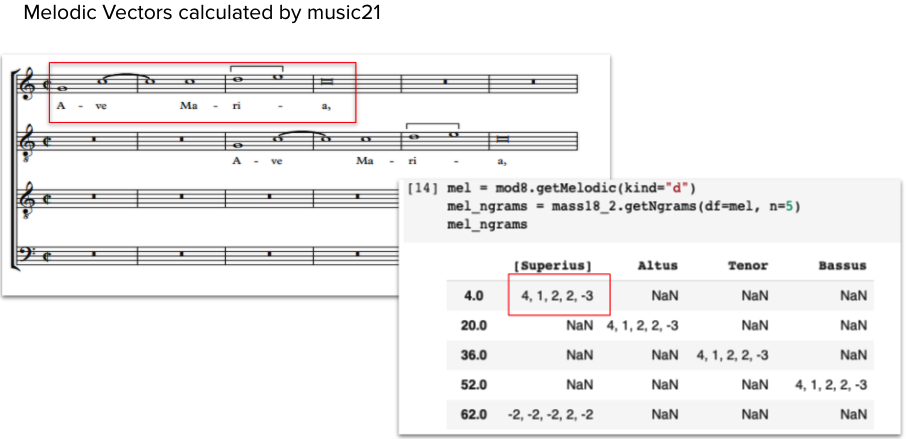


### C.1 Get the melodic intervals for each voice

* Note that **kind** is a variable--you can change it, then run the cell to see the results.
<br>

* `q` = diatonic (with 'quality', thus distinguishing between Perfect, Major, and Minor intervals)
* `d` = diatonic (without quality)
* `c` = chromatic 
* `z` = zero-based (diatonic, but with unison is represented as "0")
<br>
    
* add `compound=True` to see 10ths and 3rds as different; `compound=False` for them to be the same.  For example:
    * `model.getMelodic(kind="d", compound=True).fillna('-')`
    
<br>

* read the `getMelodic` documentation with `print(model.getMelodic.__doc__)`

In [8]:
print(model.getMelodic.__doc__)


        Return melodic intervals for all voice pairs. Each melodic interval
        is associated with the starting offset of the second note in the
        interval. If you want melodic intervals measured at a regular duration,
        do not pipe this methods result to the `unit` method. Instead,
        pass the desired regular durational interval as an integer or float as
        the `unit` parameter.

        :param str kind: use "q" (default) for diatonic intervals with quality,
            "d" for diatonic intervals without quality, "z" for zero-indexed
            diatonic intervals without quality (i.e. unison = 0, second = 1,
            etc.), or "c" for chromatic intervals. Only the first character is
            used, and it's case insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a higher pitch than the voice that is
            higher on the staff. This is desginated with a "-" prefix.
      

In [9]:
mel = model.getMelodic(kind="d").fillna('-')
mel.head(20)

,[Superius],Altus,Tenor,Bassus
0.0,-,Rest,Rest,Rest
4.0,4,-,-,-
8.0,-,Rest,Rest,Rest
12.0,1,-,-,-
16.0,2,-,Rest,Rest
20.0,2,4,-,-
24.0,-3,-,Rest,Rest
28.0,-,1,-,-
32.0,Rest,2,-,Rest
36.0,-,2,4,-


### C.2 Get Melodic nGrams
* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.

<br>

* CRIM Intervals can create **melodic** or **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one]).

<br>

* To use the `getNgrams` method, we "pass" the results of `getMelodic` or `getHarmonic` (see below) to it.  For instance we set the variable name `mel` `model.getMelodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  
    * `model.getNgrams(df=mel, n=4)`.  

<br>

* We could also combine these steps in a single line of code: 
    * `ngrams = model.getNgrams(df=model.getMelodic(kind="d", compound=False), n=4)`

In [13]:
mel = model.getMelodic(kind="d", compound=False)
ngrams = model.getNgrams(df=mel, n=4)
ngrams

,[Superius],Altus,Tenor,Bassus
4.0,"4, 1, 2, 2",NaN,NaN,NaN
12.0,"1, 2, 2, -3",NaN,NaN,NaN
20.0,NaN,"4, 1, 2, 2",NaN,NaN
28.0,NaN,"1, 2, 2, -3",NaN,NaN
36.0,NaN,NaN,"4, 1, 2, 2",NaN
...,...,...,...,...
1216.0,NaN,NaN,NaN,"-2, -2, -2, -2"
1236.0,"1, -2, -2, -2","1, 1, -3, 2",NaN,NaN
1240.0,"-2, -2, -2, 2","1, -3, 2, 2","1, -2, 2, 2","8, -4, 2, -2"
1244.0,"-2, -2, 2, 1","-3, 2, 2, 1","-2, 2, 2, -2","-4, 2, -2, -5"


We can also display **measure+beat addresses**

*  The results of the previous **nGram** method are now 'passed' to the **detailIndex** method

In [14]:
model.detailIndex(ngrams)

AttributeError: 'int' object has no attribute 'beat'

### C.3 How Many nGrams?

* Pandas includes many **built-in methods** that make it simple to summarize and explore data
<br>

* `value_counts()` tells us how many of each nGram in each voice:  `ngrams.value_counts().to_frame()`
    
<br>

* `stack()` combines all the voices into one column, so we can see the nGrams of the piece in one view: 
`ngrams.stack().value_counts().to_frame()`

In [47]:
ngrams.stack().value_counts().to_frame()

,0
"-2, -2, -2, -2",34
"2, -2, -2, -2",26
"-2, -2, -2, 2",21
"1, 2, -2, -2",13
"-2, -2, 2, 2",13
...,...
"-3, -2, 8, -3",1
"2, 2, 1, 1",1
"1, -5, 8, -3",1
"-2, 8, -3, -2",1


### C.4 Search Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to interact with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind=d` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [50]:
@interact
def get_ngrams(search_pattern="", kind=["q", "d", "c", "z"], compound=[True, False], length=[3, 4, 5, 6, -1], style=["offsets", "measures/beats"], endpoint=["first", "last"]):
    ngrams = model.getNgrams(df=model.getMelodic(kind=kind), n=length, offsets=endpoint)
    mask = ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)
    filtered_ngrams = ngrams[mask].copy()
    bm1 = model.detailIndex(filtered_ngrams)
    if style == "offsets":
        return filtered_ngrams.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    else:
        return bm1.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('q',…

## D. Harmonic Intervals and nGrams

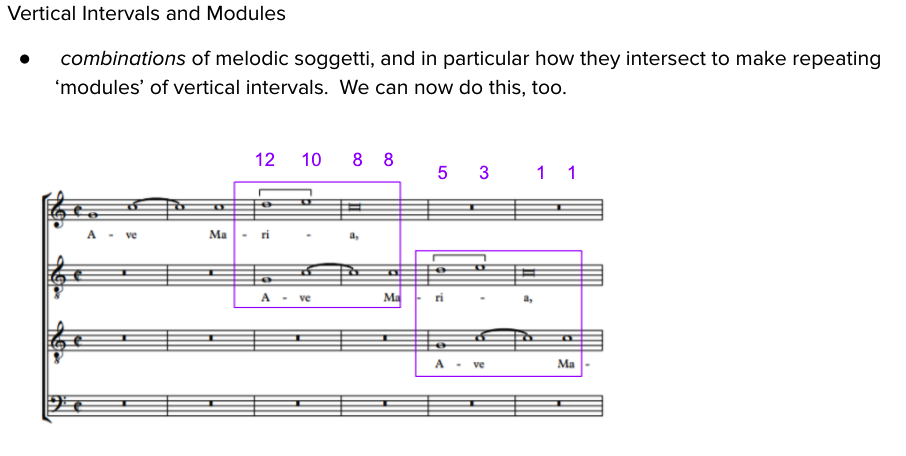

### D.1 getHarmonic

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)

In [11]:
model.getHarmonic(kind="d", compound=False).fillna("-")


,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
0.0,Rest,Rest,Rest,Rest,Rest,Rest
4.0,-,-,Rest,-,Rest,Rest
8.0,Rest,Rest,Rest,Rest,Rest,Rest
12.0,-,-,Rest,-,Rest,Rest
16.0,Rest,Rest,Rest,Rest,Rest,5
...,...,...,...,...,...,...
1256.0,5,8,3,4,6,-
1268.0,-,8,4,4,7,4
1272.0,8,5,8,5,8,-
1284.0,-,5,8,5,8,4


### D.2 Search Harmonic nGrams

* See Section **C.4** for explanation of the interactive search.

* Examples:

    * Two patterns: `12, 10, 8, 8|5, 3, 1, 1`

    * Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
   
    
    * Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [51]:
# note that time_unit does not yet work with getHarmonic
@interact
def get_harmonic_ngrams(search_pattern="", kind=["d", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], style=["offsets", "measures/beats"], endpoint=["first", "last"]):    
    model_harmonic = model.getHarmonic(kind=kind, compound=compound)
    ngrams = model.getNgrams(df=model_harmonic, n=length, offsets=endpoint)
    filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)].copy()
    bm2 = model.detailIndex(filtered_ngrams)
    if style == "offsets":
        return filtered_ngrams.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    else:
        return bm2.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    
    return filtered_ngrams.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")


interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

### D.3  Finding Cadential Tones with Harmonic nGrams

*  Here we return a **3-gram for an authentic cadence with suspension formula** (in either `7, 6, 8` pattern, or `2, 3, 1`).
* Then we **filter** the original list of **Notes and Rests** to match only **final offsets of those nGrams** (which will likely be the final sonority of each cadence pattern).
*  This tells us **which pitches are sounding in which voices**, which is a proxy for a **tonal type for the cadence**

<br>

* Note that we can provide various settings:  `compound`, `diatonic`, `length`, the `endpoint` of for purposes of indexing.
* Here we show the results both by `offset` and `measure/beat`.

In [52]:
cadence_filter = get_harmonic_ngrams("7, 6, 8|2, 3, 1", "d", True, 3, "offsets", "last")
cadence_list = cadence_filter.index.tolist()
cadence_tones = model.getNoteRest()
df = cadence_tones.loc[cadence_list,:].fillna("-")
df2 = model.detailIndex(df)
display(df)
display(df2)

,[Superius],Altus,Tenor,Bassus
232.0,C5,E4,C4,A2
272.0,E5,E4,Rest,Rest
304.0,Rest,B3,E4,E3
416.0,C5,G3,C4,C3
466.0,C5,C4,-,-
472.0,C5,C4,C4,C3
506.0,-,-,C4,C3
512.0,E5,Rest,C4,C3
536.0,G4,G4,E4,Rest
552.0,Rest,C4,C4,A3


,,[Superius],Altus,Tenor,Bassus
Measure,Beat,,,,
30,1.0,C5,E4,C4,A2
35,1.0,E5,E4,Rest,Rest
39,1.0,Rest,B3,E4,E3
53,1.0,C5,G3,C4,C3
59,2.0,C5,C4,-,-
60,1.0,C5,C4,C4,C3
64,2.0,-,-,C4,C3
65,1.0,E5,Rest,C4,C3
68,1.0,G4,G4,E4,Rest


## E.  Contrapuntal Modules

* A **contrapuntal module** (as formulated by our colleagues Julie Cumming and Peter Schubert) is an **nGram** that describes the movement of any two voices:  a succession of **harmonic** intervals separated by the **melodic motion of the lower (tenor) voice**.

<br>

* In simplest form, these would be 5-Grams, as shown below, but we can search for **modules** of any length.

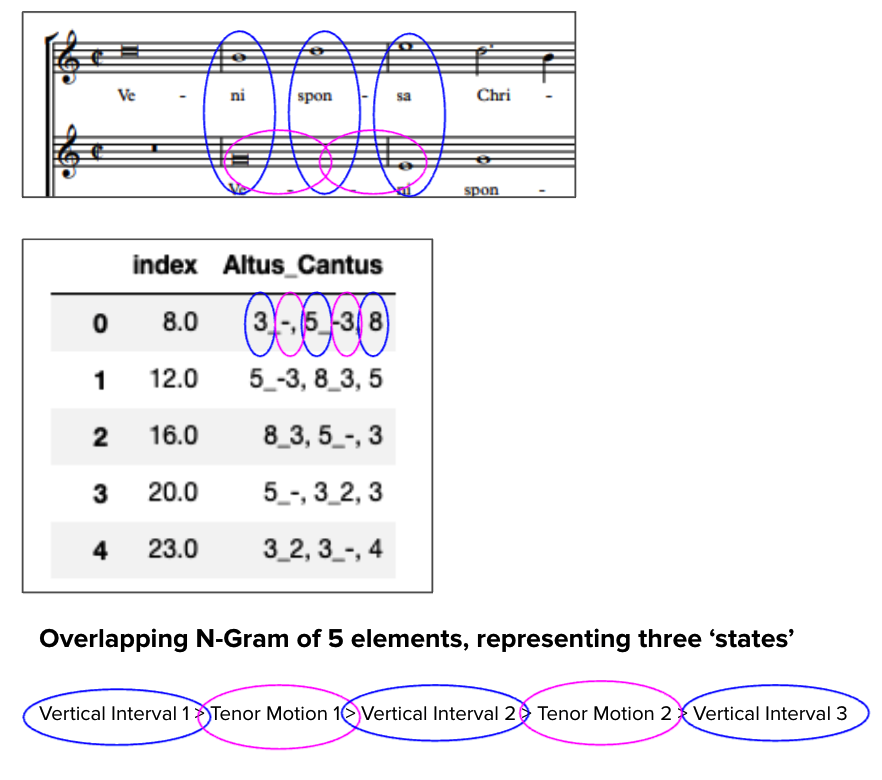





### E.1 Count Modules

* how many of each `nGram` in this piece?

In [54]:
model_har = model.getHarmonic(kind="d", compound=True)
ngrams = model.getNgrams(df=model_har, n=3, how='modules', exclude=['Rest'])
ngrams.stack().value_counts().to_frame()

,0
"6_2, 5_Held, 6",19
"5_Held, 6_2, 5",16
"8_Held, 7_Held, 6",12
"8_-2, 9_-2, 10",9
"7_Held, 6_-2, 8",8
...,...
"7_2, 6_-2, 8",1
"-3_-3, 1_Held, 6",1
"3_-4, 6_2, 6",1
"11_Held, 10_8, 4",1


### E.2  Search for Modules

* Authentic/Phrygian cadence with suspension in **diatonic**: `7_Held, 6_-2, 8` or `2_-3, 3_2, 1`

* Authentic/Phrygian cadence with suspension in **chromatic**: `11_Held, 9_-2, 12`

* Authentic/Phrygian cadence with suspension in **zero-based**: `6_Held, 5_-2, 7`

* Plagal cadence (no suspension) is often **diatonic**:  `6_-2, 6_-2, 6` at same time we hear `5_2,-4, 5`

In [57]:
@interact
def get_modules(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], style=["offsets", "measures/beats"], endpoint=["last", "first"]):
    
    model_har = model.getHarmonic(kind=kind, compound=compound)
    ngrams = model.getNgrams(df=model_har, n=length, how='modules', exclude=['Rest'], offsets=endpoint)
    filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)].copy()
    bm3 = model.detailIndex(filtered_ngrams)
    if style == "offsets":
        return filtered_ngrams.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    else:
        return bm3.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    


interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## F. Mapping nGrams

In [58]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Model_0008.mei'])
model = corpus.scores[0]
mel = model.getMelodic(kind='d', compound=False, unit=0)
mel_ngrams = model.getNgrams(df=mel, n=5)
# mel_ngrams_tuple = model.getNgrams(df=mel, n=5, cell_type=tuple)
# mel_ngrams_list = model.getNgrams(df=mel, n=5, cell_type=list)

Memoized piece detected...


In [17]:
mel_ngrams.stack().dropna().value_counts() 

1, 2, -2, -2, -2     13
2, -2, -2, -2, -2    11
1, 1, 2, -2, -2       9
2, -3, 2, -2, -2      8
-2, -2, -2, 2, 2      8
                     ..
-5, 6, -2, 3, -2      1
-2, -2, -3, 8, -2     1
-2, -2, -2, 5, 2      1
2, 2, -3, 1, 2        1
-2, 3, -2, -5, 6      1
Length: 307, dtype: int64

### F.1 Mapping nGrams

In [18]:
nr = model.getNoteRest()
dur = model.getDuration(nr)
dur = dur.applymap(str, na_action='ignore')
nr.reindex_like(dur)
nr_ngrams = model.getNgrams(df=nr, n=5)
dur_ngrams = model.getNgrams(df=dur, n=5)
dur_ngrams = dur_ngrams.applymap(lambda cell: sum([float(el) for el in cell.split(", ")]) if pd.notna(cell) else cell)
nr_ngrams

,[Superius],Altus,Tenor,Bassus
0.0,"G4, C5, C5, D5, E5",NaN,NaN,NaN
4.0,"C5, C5, D5, E5, C5",NaN,NaN,NaN
16.0,NaN,"G3, C4, C4, D4, E4",NaN,NaN
20.0,NaN,"C4, C4, D4, E4, C4",NaN,NaN
32.0,NaN,NaN,"G3, C4, C4, D4, E4",NaN
...,...,...,...,...
1212.0,NaN,NaN,NaN,"G3, F3, E3, D3, C3"
1232.0,"E5, E5, D5, C5, B4","G4, G4, G4, E4, F4",NaN,NaN
1236.0,"E5, D5, C5, B4, C5","G4, G4, E4, F4, G4","C4, C4, B3, C4, D4","C3, C4, G3, A3, G3"
1240.0,"D5, C5, B4, C5, C5","G4, E4, F4, G4, G4","C4, B3, C4, D4, C4","C4, G3, A3, G3, C3"


In [19]:
# plot only the most frequent patterns
most_popular = nr_ngrams.stack().head(20).value_counts().index.to_list()
most_popular

['G3, C4, C4, D4, E4',
 'C4, C4, D4, E4, C4',
 'G4, A4, G4, C5, B4',
 'G2, C3, C3, D3, E3',
 'A3, G3, A3, G3, C4',
 'A4, G4, C5, B4, A4',
 'C5, B4, A4, B4, C5',
 'G3, A3, G3, C4, B3',
 'C4, B3, A3, G3, A3',
 'C3, C3, D3, E3, C3',
 'A4, G4, A4, G4, C5',
 'G4, C5, C5, D5, E5',
 'A3, G3, C4, B3, A3',
 'C5, B4, A4, G4, A4',
 'C5, C5, D5, E5, C5',
 'B3, A3, G3, A3, G3',
 'B4, A4, G4, A4, G4',
 'G4, C5, B4, A4, B4']

In [20]:
viz.plot_ngrams_heatmap(nr_ngrams, dur_ngrams, selected_pattern=most_popular, voices=[])

alt.VConcatChart(...)

### F. 2 Similar nGrams

*  Uses **Levenshtein Distance** ("edit distance") to evaluate how many changes must be made to a given nGram to match another.
* https://en.wikipedia.org/wiki/Levenshtein_distance
* The **slider** below determines how close the two melodies must be to count as a match for the given string of intervals.  100 = exact

In [21]:
viz.plot_close_match_heatmap(mel_ngrams, "-2, -3, 2, -2", selected_patterns=[], voices=[])

alt.Chart(...)

## G.  Mapping CRIM Relationship and Observation Data

* CRIM Data is stored in a format called **JSON**, allows us to retrieve various data fields and their values directly from the CRIM server
* These **structured data** can be queried, mapped, and analyzed in various ways

###  G.1 List the CRIM Relationships

* The list of Pieces that are Models in CRIM Relationships
* We could also find **df_relationships['derivative_observation.piece.piece_id'].unique()**
* The particular piece from the list is chosen via **files[0]**. [0] is just the first piece.

In [22]:
data_relationships = requests.get('http://crimproject.org/data/relationships/').json()
#df = pd.DataFrame(data)
df_relationships = pd.json_normalize(data_relationships)
files = df_relationships['model_observation.piece.piece_id'].unique()
# files = df_relationships['derivative_observation.piece.piece_id'].unique()
df_relationships_0008 = df_relationships[df_relationships['model_observation.piece.piece_id'] == files[15]].copy()

In [23]:

files

array(['CRIM_Model_0011', 'CRIM_Model_0018', 'CRIM_Model_0017',
       'CRIM_Mass_0015_2', 'CRIM_Model_0001', 'CRIM_Model_0020',
       'CRIM_Model_0009', 'CRIM_Model_0019', 'CRIM_Model_0010',
       'CRIM_Model_0022', 'CRIM_Model_0002', 'CRIM_Model_0016',
       'CRIM_Model_0024', 'CRIM_Model_0021', 'CRIM_Mass_0018_1',
       'CRIM_Model_0008', 'CRIM_Mass_0018_3', 'CRIM_Model_0012',
       'CRIM_Model_0023', 'CRIM_Model_0015', 'CRIM_Model_0013',
       'CRIM_Mass_0005_1', 'CRIM_Mass_0016_2', 'CRIM_Mass_0020_3',
       'CRIM_Model_0006', 'CRIM_Model_0025'], dtype=object)

In [24]:
df_relationships_0008.head()

,url,id,relationship_type,musical_type,rt_q,rt_q_x,rt_q_monnayage,rt_tm,rt_tm_snd,rt_tm_minv,...,model_observation.piece.url,model_observation.piece.piece_id,model_observation.piece.full_title,model_observation.ema,derivative_observation.url,derivative_observation.id,derivative_observation.piece.url,derivative_observation.piece.piece_id,derivative_observation.piece.full_title,derivative_observation.ema
871,http://crimproject.org/data/relationships/882/,882,Mechanical transformation,Imitative duo,False,False,False,True,True,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0008,Ave Maria,"54-65/1-2,1-2,1-2,1-2,1-2,1-3,1-4,3-4,3-4,3-4,...",http://crimproject.org/data/observations/1764/,1764,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0005_5,Missa Ave Maria: Agnus Dei,"16-20,25-29/3,3-4,3-4,3-4,3-4,1-2,1-2,1-2,1-2,..."
872,http://crimproject.org/data/relationships/883/,883,Non-mechanical transformation,Periodic entry,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0008,Ave Maria,"1-10/1,1-4,1-4,1-4,2-4,2-4,3-4,3-4,4,4/@1-3,@1...",http://crimproject.org/data/observations/1766/,1766,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0005_5,Missa Ave Maria: Agnus Dei,"1-8/1-4,1-4,1-4,1-4,1-4,3-4,3-4,3-4/@1-3+@all+..."
971,http://crimproject.org/data/relationships/982/,982,New material,Homorhythm,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0008,Ave Maria,1/1/@1-3,http://crimproject.org/data/observations/1964/,1964,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0005_5,Missa Ave Maria: Agnus Dei,"34-39/1+4,1+4,1+4,1+4,1+4,1+4/@1-4+@1-4,@1-3+@..."
972,http://crimproject.org/data/relationships/983/,983,Non-mechanical transformation,Soggetto,False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0008,Ave Maria,"44-46/1,1,1/@3,@1-3,@1",http://crimproject.org/data/observations/1966/,1966,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0005_5,Missa Ave Maria: Agnus Dei,"41-45/3-4,3-4,1-4,1-2,1-2/@4+@2-4,@1-3+@1-3,@4..."
973,http://crimproject.org/data/relationships/984/,984,Non-mechanical transformation,"Fuga, Homorhythm",False,False,False,False,False,False,...,http://crimproject.org/data/pieces/CRIM_Model_...,CRIM_Model_0008,Ave Maria,"46-48/1+3-4,1+3-4,1+4/@3+@2-4+@4,@1-3+@1-4+@1-...",http://crimproject.org/data/observations/1968/,1968,http://crimproject.org/data/pieces/CRIM_Mass_0...,CRIM_Mass_0005_5,Missa Ave Maria: Agnus Dei,"45-46/1+3-4,1+3-4/@3-4+@2-3+@3-4,@1-4+@1-3+@1-4"


###  G. 2 A Single Relationship in JSON format

In [25]:
df_relationships_0008.iloc[0, :]

url                                           http://crimproject.org/data/relationships/882/
id                                                                                       882
relationship_type                                                  Mechanical transformation
musical_type                                                                   Imitative duo
rt_q                                                                                   False
rt_q_x                                                                                 False
rt_q_monnayage                                                                         False
rt_tm                                                                                   True
rt_tm_snd                                                                               True
rt_tm_minv                                                                             False
rt_tm_retrograde                                                      

### G.3 Relationship HeatMap

* Here we show **musical types** and **observer**.  We could in fact plot other data, too
* The bar graph at the left shows observations by **musical type**, while the one at the right shows relationships by **analyst**
* The heatmap at the bottom plots the **individual observations in musical time**
* **Click** on the bar for each musical type to highlight just that type in all the charts
* **Hover** over the individual heat map segment to see certain details, and **Click** on this pop-up to visit the given Relationship on CRIMproject.org


In [26]:
viz.plot_relationship_heatmap(df_relationships_0008, 'derivative_observation.ema', main_category='musical_type', other_category='observer.name', heat_map_width=800,
                              heat_map_height=300)

alt.VConcatChart(...)

### G.4 Observation Heat Map

In [27]:
data_observations = requests.get('http://crimproject.org/data/observations/').json()
df_observations = pd.json_normalize(data_observations)
df_observations_0011 = df_observations[df_observations['piece.piece_id'] == 'CRIM_Model_0011'].copy()
viz.plot_relationship_heatmap(df_observations_0011, 'ema', main_category='musical_type', other_category='observer.name', option=1, heat_map_width=800,
                              heat_map_height=300)

alt.VConcatChart(...)

In [28]:

df_observations_pen = df_observations[df_observations['musical_type']=='Periodic entry'].copy()
df_observations_pen.iloc[0, :]

url                       http://crimproject.org/data/observations/6/
id                                                                  6
ema                     9-12/3-4,2-4,2,2/@4+@1-4,@4+@1-4+@1-3,@1-3,@1
musical_type                                           Periodic entry
mt_cf                                                           False
                                          ...                        
observer.name                                            Drew Ivarson
piece.url           http://crimproject.org/data/pieces/CRIM_Mass_0...
piece.piece_id                                       CRIM_Mass_0009_5
piece.full_title                     Missa Tota pulchra es: Agnus Dei
piece.mass                                             CRIM_Mass_0009
Name: 5, Length: 91, dtype: object

## H. Classification:  Predicting Presentation Types

* The Classifier searches for **matching soggetti in a single piece**, measures the time intervals between them and guesses which of these patterns are **Periodic Entries**, **Imitative Duos**, or **Fugas** (it is not yet possible to do so for Non-Imitative Duos)
* The parameters can be adjusted in various ways to determine:
* The kind of match (**exact** or **close**)
* The kind of musical space (**diatonic = generic** or **chromatic = semitone**)
* The length of the soggetto (or **vector**)
* Other details about minimum and maximum spacing between soggetti before a new pattern is found

It is possible to run this tool on several files at once, then combine the results

### H.1 Load the Piece

In [29]:
pieces = ["CRIM_Model_0008.mei"]

### H.2 Set Parameters
* **Vector Size** determines the length of the soggetti
* **Interval Type**:  use *generic* for diatonic or *semitone* for chromatic
* **Match Type**:  use *exact* or *close*.  If *close*, then you will need to select: 
* **Close Distance**, which is the maximum number of melodic differences allowed among matching soggetti ("1" is generally sufficient)
* The *miminum number of matches*, which will in turn be the smallest allowable size for your presentation types.  Use **min_exact_matches** or **min_close_matches**.  These will be applied according to your choice of Match Type.


In [30]:
options = {
    "min_exact_matches":2,
    "min_close_matches":5,
    "close_distance":1,
    "vector_size":4,
    "increment_size":4,
    "forward_gap_limit":40,
    "backward_gap_limit":40,
    "min_sum_durations":10,
    "max_sum_durations":30,
    "offset_difference_limit":500,
    "duration_type":"real",
    "interval_type":"generic",
    "match_type":"close"
}



### H.3 Run Classifier and View Results

The table includes 
* **piece title**
* **intervals of the matching soggetti**
* the **predicted type**
* the **order entries, by voice**
* the **measure/beat addresses**
* the **sum of the durations** of the soggetti

In [31]:
batch_classify(pieces, **options)

Successfully imported.
Finding close matches...
107 melodic intervals had more than 5 exact or close matches.



piece_title pattern_generating_match   pattern_matched  \
entry_number                                                          
0              Ave Maria            (1, 2, 2, -3)     (1, 2, 2, -3)   
1              Ave Maria          (-2, -2, -2, 2)   (-2, -2, -2, 2)   
2              Ave Maria          (-2, -2, 2, -2)   (-2, -2, 2, -2)   
3              Ave Maria           (2, -2, 4, -2)    (2, -2, 4, -2)   
4              Ave Maria          (-2, 4, -2, -2)   (-2, 4, -2, -2)   
5              Ave Maria           (4, -2, -2, 2)    (4, -2, -2, 2)   
6              Ave Maria           (-2, -2, 2, 2)    (-2, -2, 2, 2)   
7              Ave Maria             (1, 1, 2, 2)      (1, 1, 2, 2)   
8              Ave Maria            (1, 2, 2, -3)     (1, 2, 2, -3)   
9              Ave Maria         (-3, -2, -2, -2)  (-2, -2, -2, -2)   
10             Ave Maria            (-3, 2, 2, 2)     (-2, 2, 2, 2)   
11             Ave Maria             (2, 2, 1, 2)      (2, 2, 2, 2)   
12             Ave Maria            (2, 1, 2, -2)     (2, 2, 2, -2)   
13             Ave Maria          (-2, -2, -2, 2)   (-2, -2, -2, 2)   
14             Ave Maria           (-2, -2, 2, 2)    (-2, -2, 2, 2)   
15             Ave Maria             (1, 2, 2, 1)      (1, 2, 2, 1)   
16             Ave Maria             (2, 2, 1, 2)      (2, 2, 1, 2)   
17             Ave Maria            (2, 1, 2, -2)     (2, 1, 2, -2)   
18             Ave Maria            (1, 2, -2, 1)     (1, 2, -2, 1)   
19             Ave Maria           (1, 2, -2, -2)    (1, 2, -2, -2)   
20             Ave Maria          (2, -3, -2, -2)   (2, -2, -2, -2)   
21             Ave Maria           (2, -2, 1, -2)    (2, -2, 1, -2)   
22             Ave Maria           (-2, 1, -2, 2)    (-2, 1, -2, 2)   
23             Ave Maria            (1, 2, 2, -3)     (2, 2, 2, -3)   
24             Ave Maria            (-3, 2, 2, 2)     (-3, 2, 2, 2)   
25             Ave Maria            (2, 2, -3, 2)     (2, 2, -3, 2)   
26             Ave Maria            (2, -3, 2, 2)     (2, -3, 2, 2)   
27             Ave Maria            (2, 2, 2, -4)     (2, 2, 2, -5)   
28             Ave Maria            (2, 1, 2, -2)     (2, 2, 2, -2)   
29             Ave Maria            (2, 2, -3, 2)     (2, 2, -2, 2)   
30             Ave Maria           (2, -3, 2, -3)    (2, -2, 2, -3)   
31             Ave Maria           (-3, 2, -3, 2)    (-2, 2, -3, 2)   
32             Ave Maria           (-3, 2, -3, 2)    (-3, 2, -2, 2)   
33             Ave Maria           (2, 2, -3, -2)    (2, 2, -3, -2)   
34             Ave Maria          (-2, -2, -2, 2)   (-2, -2, -2, 2)   
35             Ave Maria           (-2, 2, 2, -2)    (-2, 2, 2, -3)   
36             Ave Maria          (2, -3, -2, -2)   (2, -3, -2, -2)   
37             Ave Maria          (-3, -2, -2, 1)   (-3, -2, -2, 1)   
38             Ave Maria           (2, -3, 2, -3)    (2, -3, 2, -3)   
39             Ave Maria           (-3, 2, -3, 2)    (-3, 2, -3, 2)   
40             Ave Maria           (2, -3, 2, -3)    (2, -3, 2, -2)   
41             Ave Maria          (-3, 2, -2, -2)   (-3, 2, -2, -2)   
42             Ave Maria          (2, -3, -2, -2)   (2, -2, -2, -2)   
43             Ave Maria            (2, -3, 2, 2)     (2, -3, 1, 2)   
44             Ave Maria            (1, 2, -2, 1)     (1, 2, -3, 1)   
45             Ave Maria           (-2, 1, -2, 2)    (-2, 1, -2, 2)   
46             Ave Maria            (1, 2, 2, -3)     (1, 1, 2, -3)   
47             Ave Maria            (2, 2, -3, 2)     (1, 2, -3, 2)   
48             Ave Maria           (2, -3, 2, -3)    (2, -3, 2, -2)   
49             Ave Maria            (1, 2, -2, 1)     (1, 2, -2, 1)   
50             Ave Maria          (-3, 2, -2, -2)   (-3, 2, -2, -2)   
51             Ave Maria          (2, -3, -2, -2)   (2, -2, -2, -2)   
52             Ave Maria           (2, -2, 1, -2)    (2, -2, 1, -2)   
53             Ave Maria         (-3, -2, -2, -2)  (-2, -2, -2, -2)   
54             Ave Maria          (4,